# Linear Regressions Project

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [205]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Checking for Outliers

In [206]:
df_numeric = df.select_dtypes(include=[float, int]) # Selecting only numerical features on the Dataset

df_numeric.corr()["SalePrice"].sort_values(ascending=False)[0:11] # Correlation beetween the features and the SalePrice

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

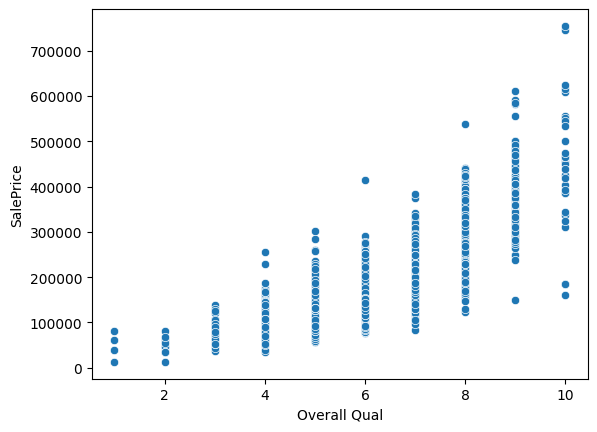

In [207]:
# Look for outliers by plotting the Overall Qual and SalePrice
sns.scatterplot(x="Overall Qual", y="SalePrice", data=df)


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

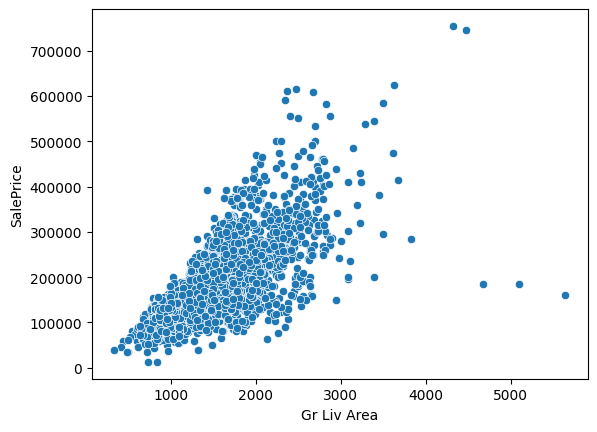

In [208]:
# Look for outliers by plotting the Gr Liv Area and SalePrice
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)

In [209]:
df[(df["Overall Qual"]>8) & (df["SalePrice"]< 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [210]:
drop_index = df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]< 400000)].index
df = df.drop(drop_index, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

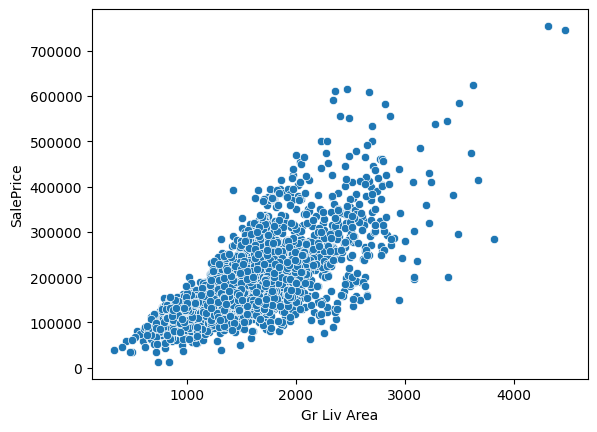

In [211]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)

## Missing Data

In [212]:
# Percentage of missing Columns
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)

    return percent_nan

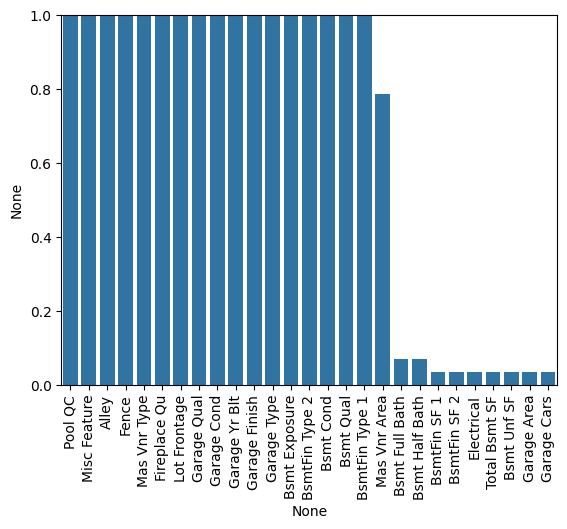

In [213]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [214]:
df = df.dropna(axis=0, subset= ["Electrical", "Garage Cars"])

In [215]:
# BSMT Numeric Columns ---> fillna as 0

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT String columns

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [216]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [217]:
garage_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_str_cols] = df[garage_str_cols].fillna("None")

In [218]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [219]:
df = df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis=1)

In [220]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

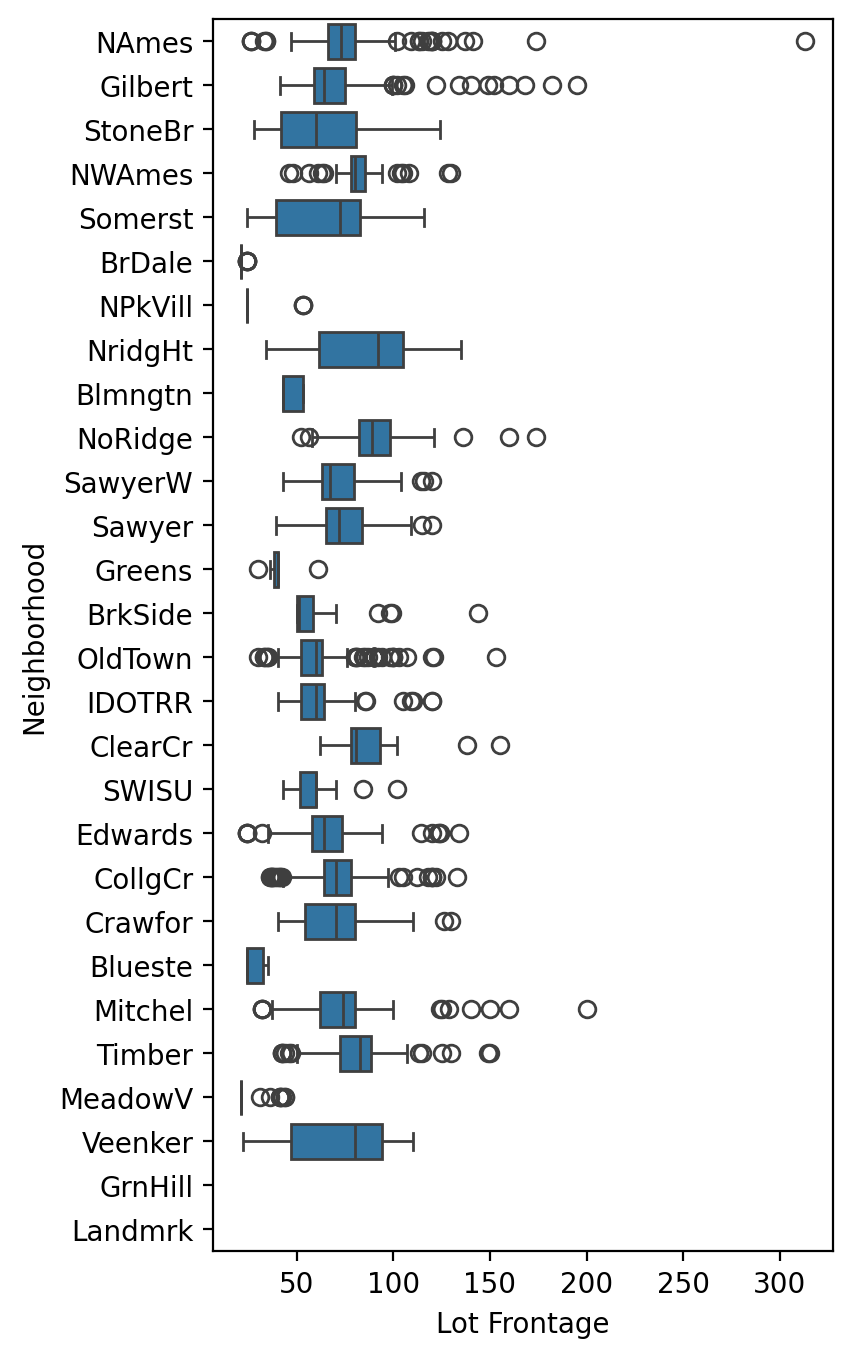

In [221]:
plt.figure(figsize=(4,8), dpi=200)
sns.boxplot(x="Lot Frontage", y= "Neighborhood", data= df, orient="h")

In [222]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [223]:
# No missing values
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [224]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [225]:
df = df.drop("PID",axis=1 )

# Encoding

In [226]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [227]:
df_objs_dummies = pd.get_dummies(df_objs, drop_first=True, dtype=int)

In [228]:
final_df = pd.concat([df_nums,df_objs_dummies], axis=1)

In [229]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


# Model

In [230]:
X = final_df.drop("SalePrice", axis='columns')
y = final_df["SalePrice"]

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [232]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [233]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()



In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [236]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [237]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


c:\Users\Bruno Santos\Desktop\Portfolio\UDEMY\Bruno\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bruno Santos\Desktop\Portfolio\UDEMY\Bruno\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bruno Santos\Desktop\Portfolio\UDEMY\Bruno\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [238]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [239]:
y_pred = grid_model.predict(scaled_X_test)

In [242]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)


np.float64(14195.354900562172)

In [241]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(20558.508566893164)